In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
user_eng = pd.read_csv('takehome_user_engagement.csv')

In [2]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
user_eng['time_stamp'] = pd.to_datetime(user_eng['time_stamp'])
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
# number of unique users
user_eng['user_id'].unique().shape

(8823,)

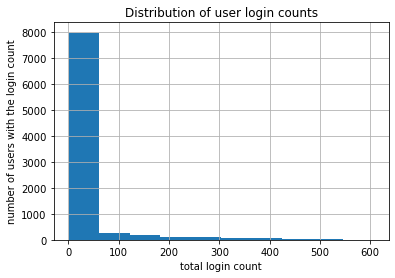

In [7]:
user_eng.groupby('user_id')['visited'].sum().hist()
plt.xlabel('total login count')
plt.ylabel('number of users with the login count')
plt.title('Distribution of user login counts');

In [8]:
# need to find the difference between two consecutive logins
# let's test on a small sample
pd.set_option('chained_assignment',None)
small_sample = user_eng[user_eng['user_id']==2]
small_sample['next_time_stamp'] = small_sample['time_stamp'].shift(-1)
small_sample['time_stamp_delta'] = (small_sample['next_time_stamp']-small_sample['time_stamp']).dt.days
small_sample

,time_stamp,user_id,visited,next_time_stamp,time_stamp_delta
1,2013-11-15 03:45:04,2,1,2013-11-29 03:45:04,14.0
2,2013-11-29 03:45:04,2,1,2013-12-09 03:45:04,10.0
3,2013-12-09 03:45:04,2,1,2013-12-25 03:45:04,16.0
4,2013-12-25 03:45:04,2,1,2013-12-31 03:45:04,6.0
5,2013-12-31 03:45:04,2,1,2014-01-08 03:45:04,8.0
6,2014-01-08 03:45:04,2,1,2014-02-03 03:45:04,26.0
7,2014-02-03 03:45:04,2,1,2014-02-08 03:45:04,5.0
8,2014-02-08 03:45:04,2,1,2014-02-09 03:45:04,1.0
9,2014-02-09 03:45:04,2,1,2014-02-13 03:45:04,4.0
10,2014-02-13 03:45:04,2,1,2014-02-16 03:45:04,3.0


In [9]:
def is_adopted_user(time_delta):
    time_delta = time_delta.values
    support=0
    for i in range(len(time_delta)-2):
        tally = time_delta[i]+time_delta[i+1]
        if tally<=7:
            support+=1
    return support
            

In [10]:
support = is_adopted_user(small_sample['time_stamp_delta'])
support

3

In [12]:
user_eng['next_time_stamp'] = user_eng.groupby('user_id')['time_stamp'].shift(-1)
user_eng['time_stamp_delta'] = (user_eng['next_time_stamp']-user_eng['time_stamp']).dt.days

user_eng_summary = user_eng.groupby('user_id')['time_stamp_delta'].apply(is_adopted_user)
user_eng_summary

user_id
1        0
2        3
3        0
4        0
5        0
        ..
11996    0
11997    0
11998    0
11999    0
12000    0
Name: time_stamp_delta, Length: 8823, dtype: int64

In [13]:
adopted_frequency = user_eng_summary.value_counts()
adopted_frequency.sort_index(inplace=True)
adopted_frequency

0      7167
1       179
2        82
3        50
4        54
       ... 
575       1
578       1
586       1
591       1
596       1
Name: time_stamp_delta, Length: 379, dtype: int64

Out of 8823 users 7167 are not adopted users, while 1656 are adopted users with varying frequency of weekly use.

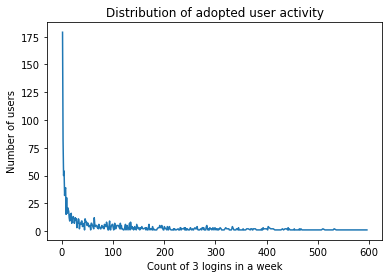

In [14]:
adopted_frequency[1:].plot()
plt.xlabel('Count of 3 logins in a week')
plt.ylabel('Number of users')
plt.title('Distribution of adopted user activity');

Text(0.5, 1.0, 'Cumulative distribution of adopted user login counts')

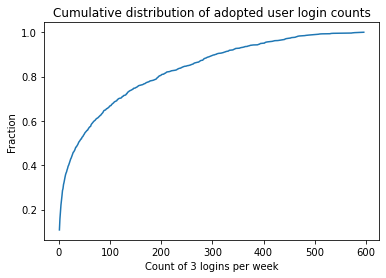

In [15]:
# the lines merge at the bottom, making it difficult to see, plot a cumulative distribution
cumulative_sum_fraction = adopted_frequency[1:].cumsum()/adopted_frequency[1:].sum()
cumulative_sum_fraction.plot()
plt.xlabel('Count of 3 logins per week')
plt.ylabel('Fraction')
plt.title('Cumulative distribution of adopted user login counts')

In [16]:
cumulative_sum_fraction[cumulative_sum_fraction<0.5]

1     0.108092
2     0.157609
3     0.187802
4     0.220411
5     0.239734
6     0.262077
7     0.285628
8     0.294686
9     0.312802
10    0.322464
11    0.335145
12    0.346618
13    0.357488
14    0.364734
15    0.370169
16    0.379227
17    0.385870
18    0.395531
19    0.399758
20    0.406401
21    0.413647
22    0.421498
23    0.428140
24    0.432367
25    0.438406
26    0.445652
27    0.451691
28    0.458333
29    0.460145
30    0.464372
31    0.468599
32    0.475242
33    0.481280
34    0.482488
35    0.486111
36    0.490338
37    0.493961
38    0.499396
Name: time_stamp_delta, dtype: float64

The cumulative distribution function increases rapidly initially then climbs slowly. There are different kinds of adopted users; 50% of users have up to 38 logins (3/week), the other 50% have up to 600 logins. Of course, it is posibble those users had more time to use the service, so it would be interesting to check when they signed up.

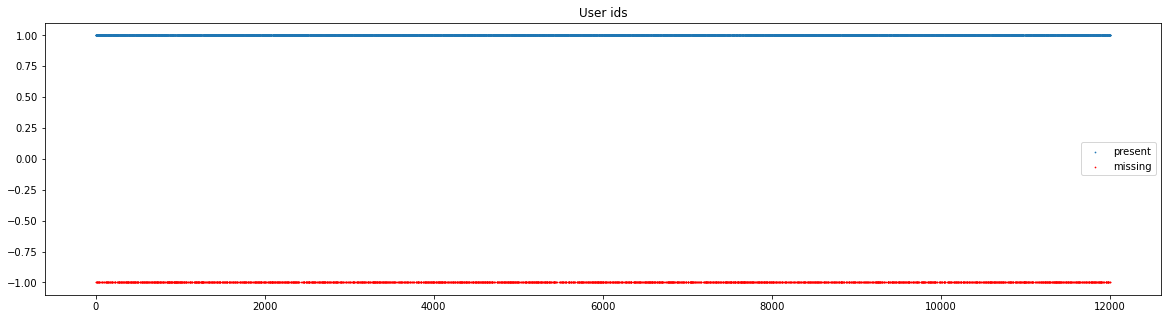

In [42]:
# We are supposed to have info for 12000 users, but instead we have 8823, let's see which user info is missing
#all_users = list(range(1, 12001))
#missing_users = [user for user in all_users if user not in user_eng_summary.index.tolist()]
plt.figure(figsize=(20,5))
plt.scatter(user_eng_summary.index, len(user_eng_summary)*[1], s=2, marker = '.', label = 'present')
plt.scatter(missing_users, len(missing_users)*[-1], s=2, marker = '.', color='r', label = 'missing')
plt.legend()
plt.title('User ids')
plt.show()

### Missing data interpretation
There does not appear to be a bias in the missing 3177 user_id numbers, they are evenly distributed in the range of 12000. Let's also create a binary column for adopted vs non_adopted users.

In [50]:
engaged = (user_eng_summary > 0).astype(int)
labeled_user_eng = pd.concat([user_eng_summary, engaged], axis=1)
labeled_user_eng.reset_index(inplace=True)
labeled_user_eng.columns = ['user_id','engagement_mag', 'engagement_bin']
labeled_user_eng.head()

,user_id,engagement_mag,engagement_bin
0,1,0,0
1,2,3,1
2,3,0,0
3,4,0,0
4,5,0,0


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [52]:
# last_session_creation time values 8823 match user_eng_table length
users  = users.merge(labeled_user_eng, how='outer', left_on='object_id', right_on='user_id')
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  user_id                     8823 non-null   float64
 11  engagement_mag              8823 non-null   float64
 12  engagement_bin              8823 non-null   float64
dtypes: float64(5), int64(4), object

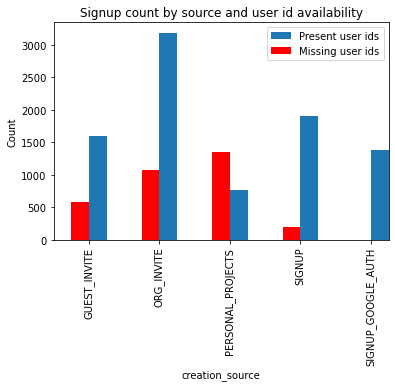

In [109]:
present_users = users[~users.user_id.isnull()].groupby('creation_source')['user_id'].count()
present_users.plot(kind='bar', label='Present user ids', position=0, width=0.25)

missing_users = users[users.user_id.isnull()].groupby('creation_source')['creation_source'].count()
missing_user_values = missing_users.tolist()
missing_user_values.append(0)
missing_user_index = missing_users.index.tolist()
missing_user_index.append('SIGNUP_GOOGLE_AUTH')
missing_users_appended = pd.Series(missing_user_values)
missing_users_appended.index = missing_user_index
missing_users_appended.plot(kind='bar', label='Missing user ids', color='red', position=1, width=0.25)

plt.legend()
plt.ylabel('Count')
plt.title('Signup count by source and user id availability')
plt.show()

The missing ids are present in 4 creation source categories out of 5. Almost twice as many user ids are missing for personal projects, hence the interpretation for this variable will have caveats as there is a bias in what users will be included in the analysis.

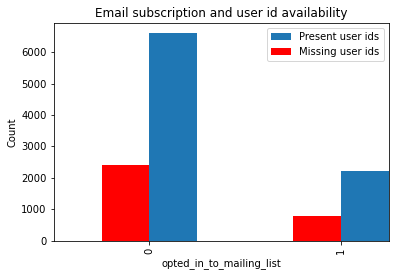

In [108]:
present_users = users[~users.user_id.isnull()].groupby('opted_in_to_mailing_list')['user_id'].count()
present_users.plot(kind='bar', label='Present user ids', position=0, width=0.25)

missing_users = users[users.user_id.isnull()].groupby('opted_in_to_mailing_list')['opted_in_to_mailing_list'].count()
missing_users.plot(kind='bar', label='Missing user ids', color='red', position=1, width=0.25)

plt.legend()
plt.ylabel('Count')
plt.title('Email subscription and user id availability')
plt.show()

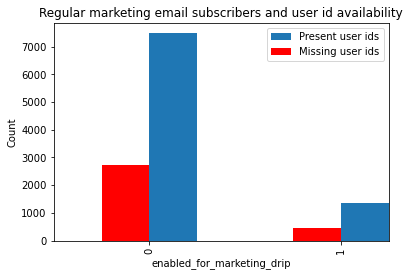

In [110]:
# similar proportion of user ids are missing from people who either subscribed or did not subscibe to the email
# so the user selection is not biased in terms of this variable
present_users = users[~users.user_id.isnull()].groupby('enabled_for_marketing_drip')['user_id'].count()
present_users.plot(kind='bar', label='Present user ids', position=0, width=0.25)

missing_users = users[users.user_id.isnull()].groupby('enabled_for_marketing_drip')['enabled_for_marketing_drip'].count()
missing_users.plot(kind='bar', label='Missing user ids', color='red', position=1, width=0.25)

plt.legend()
plt.ylabel('Count')
plt.title('Regular marketing email subscribers and user id availability')
plt.show()

In [112]:
# The user selection also seams unbiased in terms of this variable. How redundant are the email drip and opted email
# variables?
np.corrcoef(users.opted_in_to_mailing_list.values, users.enabled_for_marketing_drip.values)

array([[1.        , 0.48352909],
       [0.48352909, 1.        ]])

In [115]:
# some positive correlation but not a lot, worth keeping both
# lastly I would like to see unique Org ID numbers
users.org_id.unique().shape

(417,)

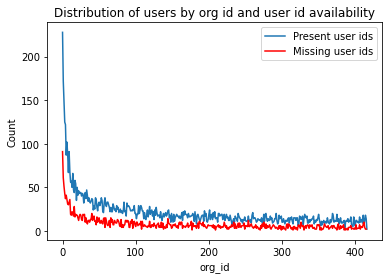

In [120]:
users[~users.user_id.isnull()].groupby('org_id')['object_id'].count().plot(label='Present user ids')
users[users.user_id.isnull()].groupby('org_id')['object_id'].count().plot(color='red', label='Missing user ids')
plt.ylabel('Count')
plt.title('Distribution of users by org id and user id availability')
plt.legend()

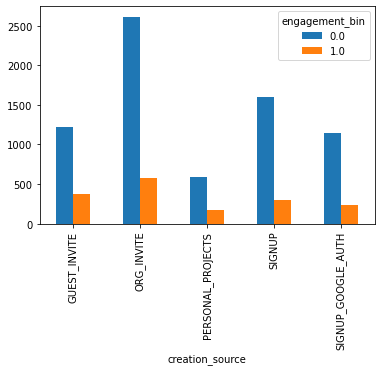

In [126]:
# simsilarly even distribution for present and missing user ids
source_eng = users.groupby(['creation_source', 'engagement_bin'])['object_id'].count()
source_eng = source_eng.unstack(level=1)
source_eng.plot(kind='bar')

In [132]:
source_eng.columns = [0, 1]
source_eng['total'] = source_eng[0] + source_eng[1]
source_eng['not_eng_fract'] = source_eng[0]/source_eng['total']
source_eng['eng_fract'] = source_eng[1]/source_eng['total']
source_eng

,0,1,total,not_eng_fract,eng_fract
creation_source,,,,,
GUEST_INVITE,1219,369,1588,0.767632,0.232368
ORG_INVITE,2614,574,3188,0.819950,0.180050
PERSONAL_PROJECTS,592,172,764,0.774869,0.225131
SIGNUP,1596,302,1898,0.840885,0.159115
SIGNUP_GOOGLE_AUTH,1146,239,1385,0.827437,0.172563


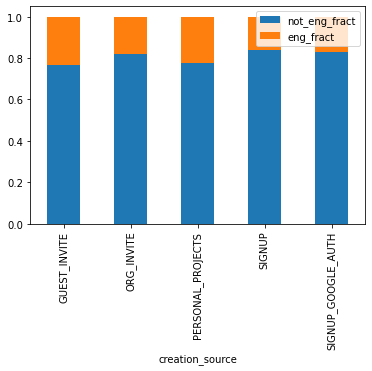

In [133]:
source_eng[['not_eng_fract', 'eng_fract']].plot(kind='bar', stacked=True)